In [1]:
import sqlite3, string
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from imblearn.pipeline import Pipeline
import joblib

In [2]:
con = sqlite3.connect('prods.db')
products = pd.read_sql("SELECT * FROM products", con)

products.drop_duplicates(inplace=True)
products.dropna(inplace=True)

products['category_name'] = products['category_name'].str.lower()

products.head()

,id,shop,product_id,name,code,category_name,category_code,price
0,1,perekrestok,32392,"Голубика Маркет Fresh, 125г",golubika-market-fresh-125g,готовимся к праздникам,gotovimsa-k-prazdnikam,239.99
1,2,perekrestok,10299,"Горошек зелёный Маркет Перекрёсток, 400г",gorosek-zelenyj-market-perekrestok-400g,готовимся к праздникам,gotovimsa-k-prazdnikam,93.99
2,3,perekrestok,404062,Колбаса Докторская варёная категории А в натур...,kolbasa-doktorskaa-varenaa-kategorii-a-v-natur...,готовимся к праздникам,gotovimsa-k-prazdnikam,779.99
3,4,perekrestok,34160,Клементины,klementiny,готовимся к праздникам,gotovimsa-k-prazdnikam,229.99
4,5,perekrestok,32227,Бананы,banany,готовимся к праздникам,gotovimsa-k-prazdnikam,119.99


,id,shop,product_id,name,code,category_name,category_code,price,general_category,clear_category
6136,6137,ashan,13403940,"Бренди Torres, Jaime I Испания, 0,7 л + 2 Стакана",torres-30-hayme-i-0-70,алкоголь (самовывоз),alkogol,11999.95,Напитки,алкоголь самовывоз
7751,7752,ashan,16016800,"Коньяк «Коктебель» 25 лет Россия, 0,7 л",koktebel-staryy-25-let-0-7,алкоголь (самовывоз),alkogol,10768.99,Напитки,алкоголь самовывоз
7679,7680,ashan,6063235,Коньяк Lheraud Vieux Millenaire в подарочной у...,konyak_lero_ve_milliner_07l_43,алкоголь (самовывоз),alkogol,7999.00,Напитки,алкоголь самовывоз
7690,7691,ashan,6062554,"Коньяк Remy Martin VSOP Франция, 0,7 л",remi_martin_vsop_konyak07lpu_40,алкоголь (самовывоз),alkogol,7067.99,Напитки,алкоголь самовывоз
7673,7674,ashan,8746843,Коньяк Hine Rare в подарочной упаковке Франция...,konyak_hayn_pap_vsop_07l_40,алкоголь (самовывоз),alkogol,6999.00,Напитки,алкоголь самовывоз
7648,7649,ashan,10912670,Коньяк ARARAT Двин в подарочной упаковке Армен...,konyak-ararat-dvin-p-u-0-7,алкоголь (самовывоз),alkogol,6947.99,Напитки,алкоголь самовывоз
6079,6080,ashan,12801143,"Аперитив Aperol Aperitivo Италия, 3 л",spirt-napitok-aperol-11-3l,алкоголь (самовывоз),alkogol,6499.95,Напитки,алкоголь самовывоз
7647,7648,ashan,15701531,"Коньяк ARARAT Васпуракан Армения, 0,7 л",konyak-ararat-vaspurakan-0-7,алкоголь (самовывоз),alkogol,6092.99,Напитки,алкоголь самовывоз
423,424,perekrestok,40091,Икра нерки зернистая,ikra-nerki-zernistaa,готовимся к праздникам,gotovimsa-k-prazdnikam,5999.00,Прочее,готовимся к праздникам
7656,7657,ashan,11682659,Коньяк Camus V. S. O. P в подарочной упаковке ...,konyak-kamyu-vsop-0-7-p-u-40,алкоголь (самовывоз),alkogol,5998.99,Напитки,алкоголь самовывоз


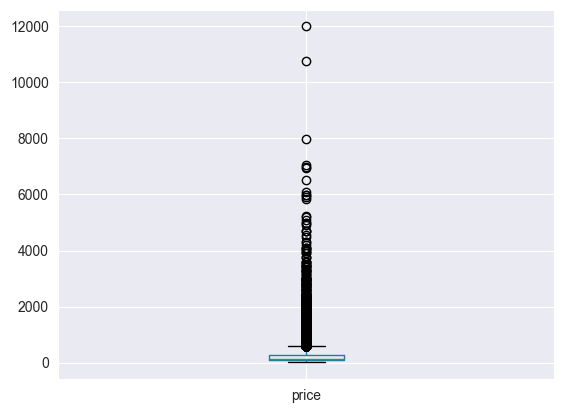

In [15]:
products.boxplot(column=['price'])
products.sort_values(by='price', ascending=False).head(15)

count    21769.000000
mean       261.487882
std        412.358708
min          1.590000
25%         74.990000
50%        139.900000
75%        279.000000
max      11999.950000
Name: price, dtype: float64

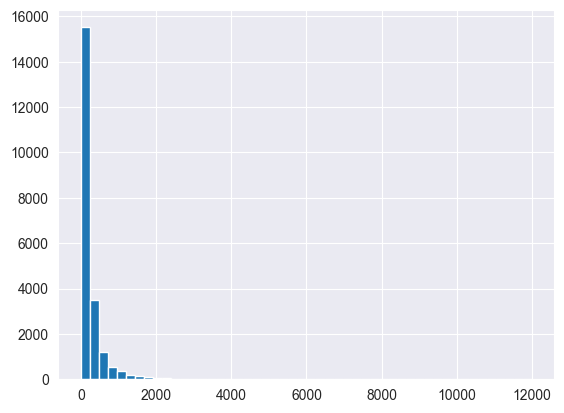

In [16]:
products['price'].hist(bins=50)
products['price'].describe()

<Axes: xlabel='category_name'>

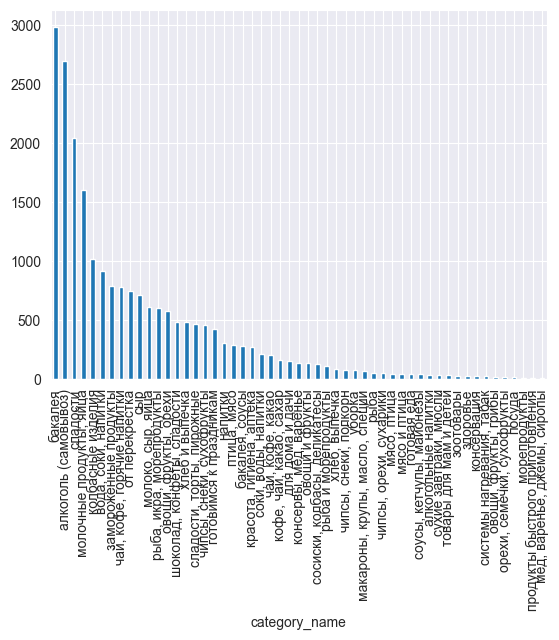

In [17]:
products['category_name'].value_counts().plot.bar()

In [3]:
products['general_category'] = np.nan

def general_category(row):
    if 'мололко' in row['category_name'] or 'молочные' in row['category_name'] or 'сыр' in row['category_name'] or 'яйца' in row['category_name']:
        return 'Молочные продукты'
    elif 'мясные' in row['category_name'] or 'колбасные' in row['category_name']  or 'мясо' in row['category_name'] or 'сосиски' in row['category_name']:
        return 'Мясные продукты'
    elif 'рыба' in row['category_name']:
        return 'Рыба и морепродукты'
    elif 'овощи' in row['category_name'] or 'фрукты' in row['category_name'] or 'орехи' in row['category_name'] or 'снеки' in row['category_name']:
        return 'Овощи, фрукты, закуски'
    elif 'бакалея' in row['category_name'] or 'соусы' in row['category_name'] or 'макароны' in row['category_name']:
        return 'Бакалея и соусы'
    elif 'сладости' in row['category_name']:
        return 'Сладости'
    elif 'консервы' in row['category_name'] or 'мед' in row['category_name'] or 'варенье' in row['category_name']:
        return 'Консервы, мед, варенье'
    elif 'выпечка' in row['category_name'] or 'хлеб' in row['category_name']:
        return 'Выпечка и хлеб'
    elif 'чай' in row['category_name'] or 'кофе' in row['category_name'] or 'сахар' in row['category_name']:
        return 'Чай, кофе, какао, сахар'
    elif 'напитки' in row['category_name'] or 'алкоголь' in row['category_name']:
        return 'Напитки'
    else:
        return 'Прочее'

products['general_category'] = products.apply(general_category, axis=1)
products.general_category = products.general_category.astype('category')
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category
12684,12685,ashan,129984,"Миндаль «ФруктОрешки» натуральный, 50 г",mindal-fruktoreshki-naturalnyy-50-g,"овощи, фрукты, орехи",ovoschi-frukty-zelen-griby-yagody,108.99,"Овощи, фрукты, закуски"
6276,6277,ashan,5781733,"Вино Cambrico Sauvignon Blan белое сухое Чили,...",vino_kambrsovblan_blsuh075,алкоголь (самовывоз),alkogol,532.99,Напитки
6624,6625,ashan,14843396,Вино Rivata Montepulciano d'Abruzzo красное су...,vino-montep-d-abruc-kr-sh-0-75,алкоголь (самовывоз),alkogol,499.99,Напитки
11499,11500,ashan,17536009,Говядина копчено-вареная АШАН Красная птица в ...,kp-govyadina-v-k-100gr,колбасные изделия,kolbasnye-izdeliya,135.99,Мясные продукты
414,415,perekrestok,298736,"Плед Belezza Северные олени микрофибра, 180х200см",pled-belezza-severnye-oleni-mikrofibra-180h200sm,готовимся к праздникам,gotovimsa-k-prazdnikam,1599.00,Прочее
6009,6010,ashan,6063190,"Водка «Белая Березка» Россия, 1 л",vodka_belaya_berezka_1l_40,алкоголь (самовывоз),alkogol,1398.00,Напитки
14766,14767,ashan,1702960,"Лепешки пшеничные Mission со злаками, 250 г",lepeshki-pshenichnye-mission-so-zlakami-250-g,хлеб и выпечка,hlebnaya-vypechka,104.99,Выпечка и хлеб
14768,14769,ashan,8339977,"Мадлен StMichel с кусочками шоколада, 175 г",sm_madlen_bisk_s_kus_shok_175g,хлеб и выпечка,hlebnaya-vypechka,398.99,Выпечка и хлеб
13629,13630,ashan,17124700,"Вареники «У Палыча» с творогом, 450 г",vareniki-s-tvorogom450g,замороженные продукты,zamorozhennye-produkty,319.99,Прочее
8245,8246,ashan,16175513,"Пиво Konix Brewery светлое Munich Helles 4,7%,...",pivo-kon-mun-hell-0-5l-steklo,алкоголь (самовывоз),alkogol,127.99,Напитки


In [4]:
products.category_name = products.category_name.astype('category')
products.category_code = products.category_code.astype('category')
products.general_category = products.general_category.astype('category')
products.dtypes

id                     int64
shop                  object
product_id             int64
name                  object
code                  object
category_name       category
category_code       category
price                float64
general_category    category
dtype: object

In [5]:
def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

products['clear_category']=products['category_name'].apply(preprocess_text)
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category,clear_category
17441,17442,ashan,16722252,Ассорти овощное АШАН Красная птица маринованно...,kp-assorti-mar-s-kab-900g,бакалея,bakaleya,179.99,Бакалея и соусы,бакалея
12436,12437,ashan,10583454,Смесь овощная АШАН Красная Овощное трио гриль ...,kp-ovoshchnoe-trio-gril-400g,"овощи, фрукты, орехи",ovoschi-frukty-zelen-griby-yagody,126.99,"Овощи, фрукты, закуски",овощи фрукты орехи
1599,1600,perekrestok,51962,"Хлебцы Щедрые 5 злаков с семенами льна, 200г",hlebcy-sedrye-5-zlakov-s-semenami-lna-200g,"чипсы, снеки, попкорн",cipsy-sneki-popkorn,93.99,"Овощи, фрукты, закуски",чипсы снеки попкорн
15629,15630,ashan,15185682,"Пастилки «Правильные сладости» Яблочные, 70 г",ps-pastilki-yablochnye-3-1-70,сладости,konditerskie_izdeliya,59.90,Сладости,сладости
17067,17068,ashan,15257396,Печенье «Кондитерские изделия Морозова» Формул...,fu-moloch-shok-s-chern-kunzh-350g,сладости,konditerskie_izdeliya,140.99,Сладости,сладости
11434,11435,ashan,552289,"Грудинка «Рублевский» варено-копченая, 300 г",grudinka-rublevskiy-vareno-kopchenaya-300-g,колбасные изделия,kolbasnye-izdeliya,329.00,Мясные продукты,колбасные изделия
1343,1344,perekrestok,326687,"Йогурт фруктовый Чудо вишня-черешня 1.9%, 260мл",jogurt-fruktovyj-cudo-visna-ceresna-1-9-260ml,"молоко, сыр, яйца",moloko-syr-ajca,59.99,Молочные продукты,молоко сыр яйца
17176,17177,ashan,220005,"Горох зеленый АШАН Красная птица колотый, 500 г",goroh-zelenyy-auchan-krasnaya-ptica-kolotyy-500-g,бакалея,bakaleya,85.99,Бакалея и соусы,бакалея
18091,18092,ashan,5416653,"Крупа манная «Карачиха» марка М, 800 г",mannaya_krupa_800g,бакалея,bakaleya,49.99,Бакалея и соусы,бакалея
11496,11497,ashan,17825070,Карпаччо из индейки сырокопченое АШАН Золотая ...,zp-karpachcho-iz-indeyk-s-k-100g,колбасные изделия,kolbasnye-izdeliya,189.99,Мясные продукты,колбасные изделия


In [6]:
x = products.clear_category
y = products.general_category
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print('Score:', text_clf.score(X_test, y_test))

Score: 0.9991648106904232


In [7]:
joblib.dump(text_clf, 'model.pkl')

['model.pkl']

In [8]:
c = sqlite3.connect('prods.db')
pr = pd.read_sql("SELECT * FROM products", c)

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price
16306,16307,ashan,8256686,"Торт «Каждый день» Ленинградский, 400 г",kdtort_leningradskiy_400g,Сладости,konditerskie_izdeliya,176.98
12330,12331,ashan,102081,"Томат Черри желтый, 250 г",tomat-moe-leto-cherri-mirabel-250-g,"Овощи, фрукты, орехи",ovoschi-frukty-zelen-griby-yagody,139.90
331,332,perekrestok,266264,Сыр Blue cheese с голубой плесенью 50% Market ...,syr-blue-cheese-s-goluboj-plesenu-50-market-co...,Готовимся к праздникам,gotovimsa-k-prazdnikam,309.99
5822,5823,magnit,1000422634,Чипсы Lays сметана-лук 140г,chipsy-lays-smetanaluk-140g,"Чипсы, орехи, сухарики",chipsy-orekhi-sukhariki,129.99
20318,20319,ashan,248460,Чай черный АШАН Красная птица с бергамотом лис...,chay-chernyy-auchan-krasnaya-ptica-s-bergamoto...,"Чай, кофе, горячие напитки",chay-kofe-sladosti,269.99
8554,8555,ashan,15056910,"Ром Devil's Island Blanco Россия, 0,5 л",rom-devilz-blanko-0-5,Алкоголь (самовывоз),alkogol,841.99
6104,6105,ashan,903724,"Бокал для вина Luminarc Domino, 350 мл",bokal-dlya-vina-luminarc-domino-350-ml,Алкоголь (самовывоз),alkogol,210.99
4069,4070,magnit,2123200142,Каша Быстров Овсяная без варки Ассорти 6пак*40г,kasha-bystrov-ovsyanaya-bez-varki-assorti-6pak40g,"Бакалея, соусы",bakaleya-sousy,169.99
20900,20901,ashan,2344966,Напиток сильногазированный АШАН Красная птица ...,napitok-silnogazirovannyy-auchan-krasnaya-ptic...,"Вода, соки, напитки",voda-soki-napitki,36.99
21273,21274,ashan,100526,"Вода питьевая «Святой Источник» без газа, 330 мл",voda-pitevaya-svyatoy-istochnik-bez-gaza-330-ml,"Вода, соки, напитки",voda-soki-napitki,26.49


In [9]:
with open('model.pkl', 'rb') as f:
    clf2 = joblib.load(f)

def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

pr['clear_category'] = pr['category_name'].apply(preprocess_text)

prediction = clf2.predict(pr['clear_category'])
pr['general_category'] = prediction

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,clear_category,general_category
8023,8024,ashan,16089505,"Настойка «Сиббиттер» Мед и Табаско 35%, 0,5 л",sibbitter-hani-tabasko-0-5l,Алкоголь (самовывоз),alkogol,408.49,алкоголь самовывоз,Напитки
15115,15116,ashan,13021795,Шоколадная фигурка «Монетный Двор» Символ Года...,shoko-figurka-simvol-goda-100g,Сладости,konditerskie_izdeliya,109.90,сладости,Сладости
17591,17592,ashan,14024921,Готовый завтрак Unicorn Подушечки с фруктовым ...,zavtrak-got-200gr-podush-s-fr-vkus,Бакалея,bakaleya,218.99,бакалея,Бакалея и соусы
12415,12416,ashan,14916968,"Кинза АШАН Красная птица, 100 г",kp-kinza-100g,"Овощи, фрукты, орехи",ovoschi-frukty-zelen-griby-yagody,79.99,овощи фрукты орехи,"Овощи, фрукты, закуски"
2620,2621,perekrestok,15211,"Сахар Мистраль тростниковый нерафинированный, ...",sahar-mistral-trostnikovyj-nerafinirovannyj-900g,"Кофе, чай, какао, сахар",kofe-caj-kakao-sahar,279.99,кофе чай какао сахар,"Чай, кофе, какао, сахар"
7324,7325,ashan,6062865,"Водка «Царь» Государев Заказ Россия, 0,5 л",vodka_car_rs18_05_l,Алкоголь (самовывоз),alkogol,295.49,алкоголь самовывоз,Напитки
2249,2250,perekrestok,45298,"Сок Я Яблоко осветленный, 970мл",sok-a-abloko-osvetlennyj-970ml,"Соки, воды, напитки",soki-vody-napitki,179.99,соки воды напитки,Напитки
12611,12612,ashan,8338942,"Изюм черный мелкий, вес",izyum_chernyy_melkiy_1kg_aukc,"Овощи, фрукты, орехи",ovoschi-frukty-zelen-griby-yagody,13.70,овощи фрукты орехи,"Овощи, фрукты, закуски"
11493,11494,ashan,18898454,"Говядина АШАН Золотая птица халяль, 325 г",zp-govyadina-halyal-325-gr,Колбасные изделия,kolbasnye-izdeliya,217.99,колбасные изделия,Мясные продукты
7868,7869,ashan,6062834,"Ликер Jagermeister Германия, 0,7 л",liker_yagermayster_07l_35,Алкоголь (самовывоз),alkogol,1970.99,алкоголь самовывоз,Напитки


C:\Users\shany\AppData\Local\Temp\ipykernel_13308\3764666843.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')


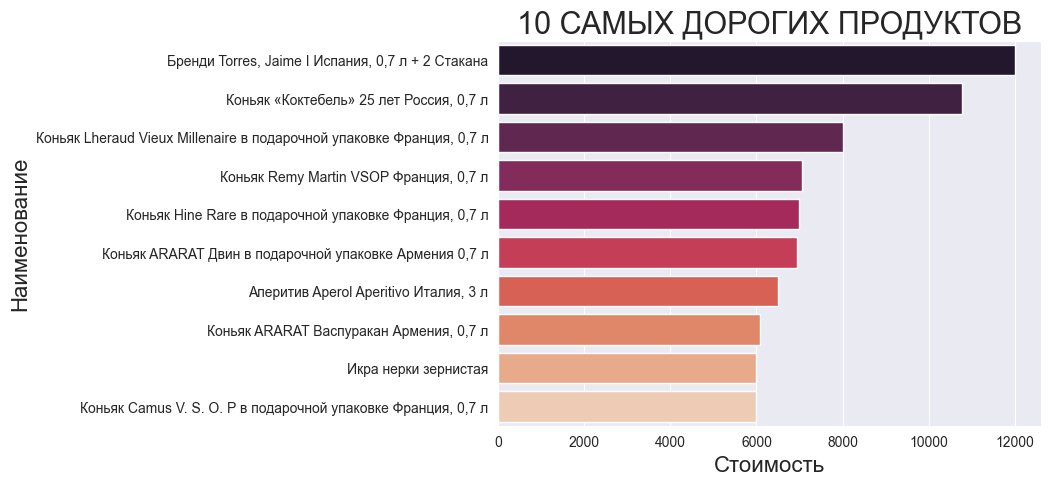

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10 = pr.sort_values(by='price', ascending=False).head(10)
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
plt.title('10 САМЫХ ДОРОГИХ ПРОДУКТОВ', fontsize=22)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Наименование', fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.savefig('top_10_max.png', bbox_inches = 'tight')

C:\Users\shany\AppData\Local\Temp\ipykernel_13308\1191127760.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')


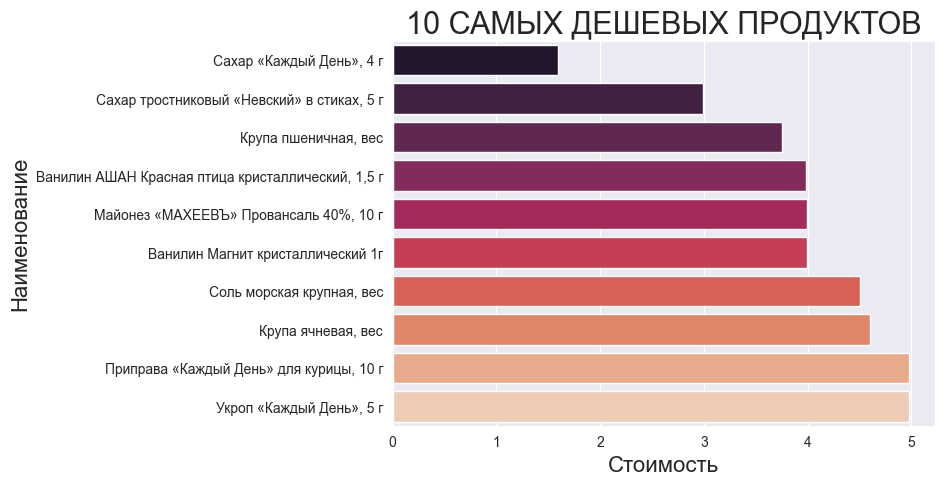

In [11]:
top_10 = pr.sort_values(by='price', ascending=True).head(10)
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
plt.title('10 САМЫХ ДЕШЕВЫХ ПРОДУКТОВ', fontsize=22)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Наименование', fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

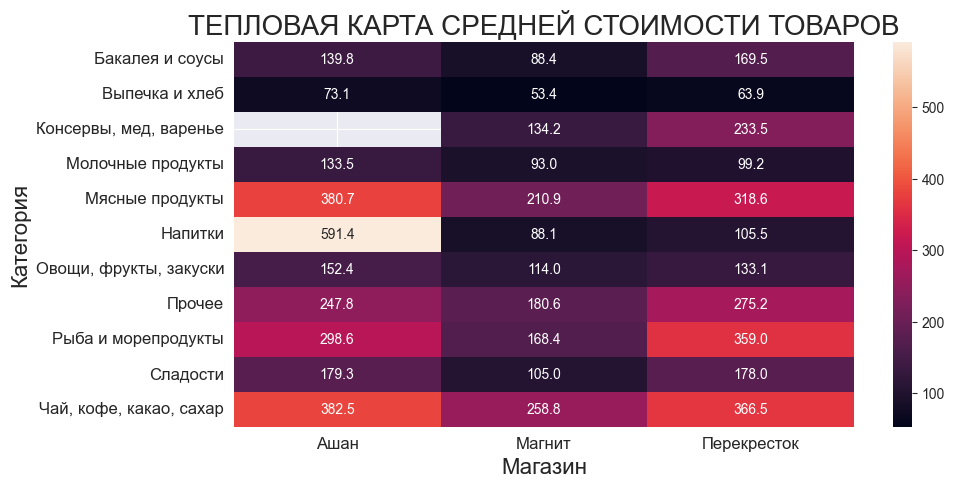

In [12]:
conditions = [(pr['shop'] == 'ashan'), (pr['shop'] == 'magnit'), (pr['shop'] == 'perekrestok')]
values = ['Ашан', 'Магнит', 'Перекресток']
pr['shop_rus'] = np.select(conditions, values)
pr.shop_rus = pr.shop_rus.astype('category')

plt.figure(figsize=(10,5))
pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc='mean')
plt.title('ТЕПЛОВАЯ КАРТА СРЕДНЕЙ СТОИМОСТИ ТОВАРОВ', fontsize=20)
sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
plt.xlabel('Магазин', fontsize=16)
plt.ylabel('Категория', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
#plt.show()

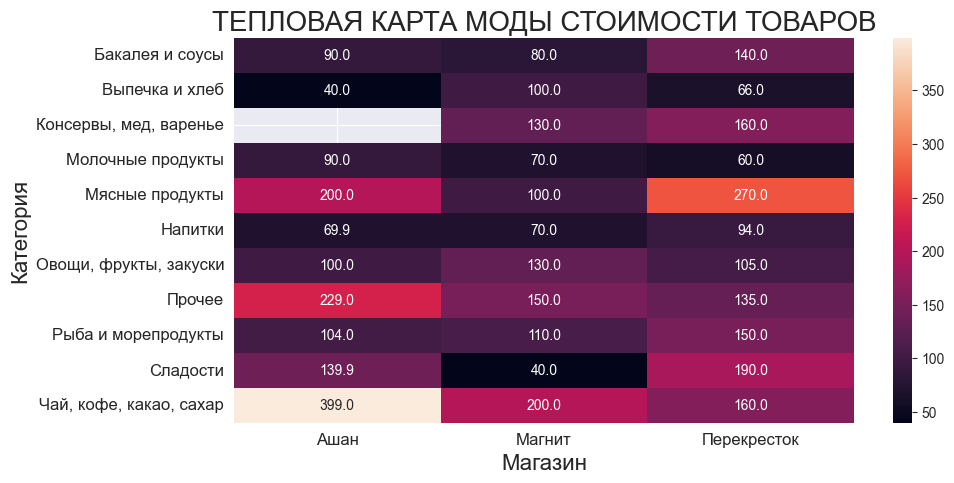

In [13]:
plt.figure(figsize=(10,5))
pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc=lambda x: x.mode().max())
plt.title('ТЕПЛОВАЯ КАРТА МОДЫ СТОИМОСТИ ТОВАРОВ', fontsize=20)
sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
plt.xlabel('Магазин', fontsize=16)
plt.ylabel('Категория', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)